# MS01: Morphogenic Frequency Mapping
## Dr. Mordin Solus - "Frequency Determines Fate!"

This notebook demonstrates the revolutionary discovery that embryonic development is guided by specific frequency signatures. Each cell type, organ, and developmental stage has a characteristic resonance.

### Key Discoveries:
- 40Hz = Neural plate identity
- Octave relationships throughout nervous system
- Heart-brain 27:1 coupling
- Metatron's cube emerges at 8-cell stage

In [7]:
# Setup
import numpy as np
import torch
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle

# Check GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


## 1. Frequency Cascade Through Development

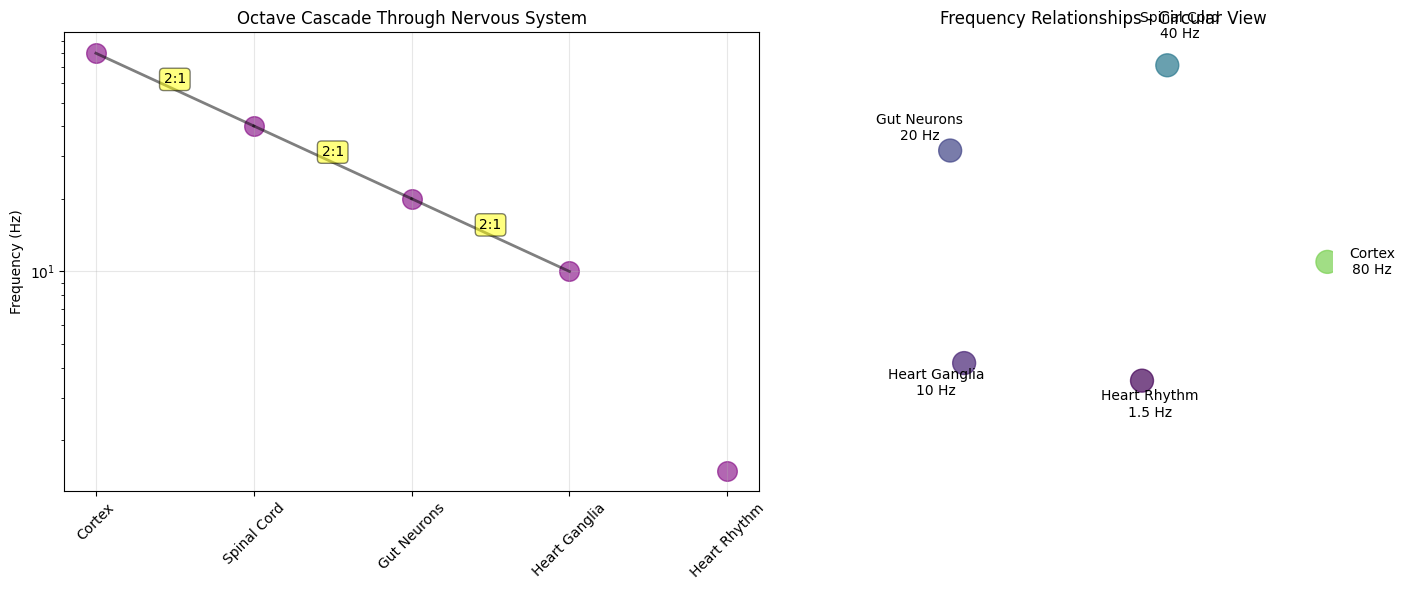


Key Insight: Perfect octave relationships create harmonic resonance throughout the body!


In [8]:
# Define the octave cascade
frequency_cascade = {
    'Cortex': 80,
    'Spinal Cord': 40,
    'Gut Neurons': 20,
    'Heart Ganglia': 10,
    'Heart Rhythm': 1.5
}

# Visualize the cascade
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Linear cascade
levels = list(frequency_cascade.keys())
freqs = list(frequency_cascade.values())

ax1.scatter(range(len(levels)), freqs, s=200, c='purple', alpha=0.6)
for i in range(len(levels)-1):
    if freqs[i] / freqs[i+1] == 2:
        ax1.plot([i, i+1], [freqs[i], freqs[i+1]], 'k-', alpha=0.5, linewidth=2)
        ax1.text(i+0.5, (freqs[i]+freqs[i+1])/2, '2:1', fontsize=10, ha='center',
                bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.5))

ax1.set_yscale('log')
ax1.set_xticks(range(len(levels)))
ax1.set_xticklabels(levels, rotation=45)
ax1.set_ylabel('Frequency (Hz)')
ax1.set_title('Octave Cascade Through Nervous System')
ax1.grid(True, alpha=0.3)

# Circular representation
angles = np.linspace(0, 2*np.pi, len(levels), endpoint=False)
ax2.set_aspect('equal')

for i, (level, freq) in enumerate(frequency_cascade.items()):
    r = np.log10(freq) + 2  # Log scale radius
    x = r * np.cos(angles[i])
    y = r * np.sin(angles[i])
    
    circle = Circle((x, y), 0.2, color=plt.cm.viridis(freq/100), alpha=0.7)
    ax2.add_patch(circle)
    ax2.text(x*1.2, y*1.2, f"{level}\n{freq} Hz", ha='center', va='center')

ax2.set_xlim(-4, 4)
ax2.set_ylim(-4, 4)
ax2.set_title('Frequency Relationships - Circular View')
ax2.axis('off')

plt.tight_layout()
plt.show()

print("\nKey Insight: Perfect octave relationships create harmonic resonance throughout the body!")

## 2. Cortical Layer Formation by Frequency

In [9]:
# Interactive cortical layer visualization
import ipywidgets as widgets

# Layer data
cortical_layers = [
    ('Layer I', 87.5, 'Cajal-Retzius cells', '#E74C3C'),
    ('Layer II', 82.5, 'Local circuits', '#E67E22'),
    ('Layer III', 77.5, 'Cortico-cortical', '#F39C12'),
    ('Layer IV', 72.5, 'Thalamic input', '#2ECC71'),
    ('Layer V', 67.5, 'Subcortical output', '#3498DB'),
    ('Layer VI', 62.5, 'Cortico-thalamic', '#9B59B6')
]

def plot_cortical_layers(highlight_layer=0):
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Draw layers
    for i, (name, freq, desc, color) in enumerate(cortical_layers):
        y = len(cortical_layers) - i - 1
        
        # Highlight selected layer
        alpha = 1.0 if i == highlight_layer else 0.5
        linewidth = 3 if i == highlight_layer else 1
        
        rect = Rectangle((0.1, y), 0.8, 0.8, 
                        facecolor=color, alpha=alpha,
                        edgecolor='black', linewidth=linewidth)
        ax.add_patch(rect)
        
        # Labels
        ax.text(0.5, y + 0.4, f'{freq} Hz', fontsize=14, 
               ha='center', va='center', fontweight='bold')
        ax.text(0.5, y + 0.15, name, fontsize=12, ha='center', va='center')
        ax.text(1.1, y + 0.4, desc, fontsize=10, va='center')
    
    # Migration arrow
    ax.annotate('', xy=(0.05, 5.5), xytext=(0.05, 0.5),
               arrowprops=dict(arrowstyle='<-', lw=3, color='red'))
    ax.text(-0.1, 3, 'Higher\nFreq\nMigrate\nFurther!', 
           fontsize=11, rotation=90, va='center', color='red', fontweight='bold')
    
    ax.set_xlim(-0.2, 2)
    ax.set_ylim(-0.5, len(cortical_layers))
    ax.set_title('Cortical Layer Formation by Frequency', fontsize=16, fontweight='bold')
    ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Interactive slider
layer_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=len(cortical_layers)-1,
    step=1,
    description='Layer:',
    continuous_update=False
)

widgets.interact(plot_cortical_layers, highlight_layer=layer_slider)

print("\nMigration Rule: Neurons 'listen' for their destination frequency!")

interactive(children=(IntSlider(value=0, continuous_update=False, description='Layer:', max=5), Output()), _do…


Migration Rule: Neurons 'listen' for their destination frequency!


## 3. Heart-Brain 27:1 Coupling

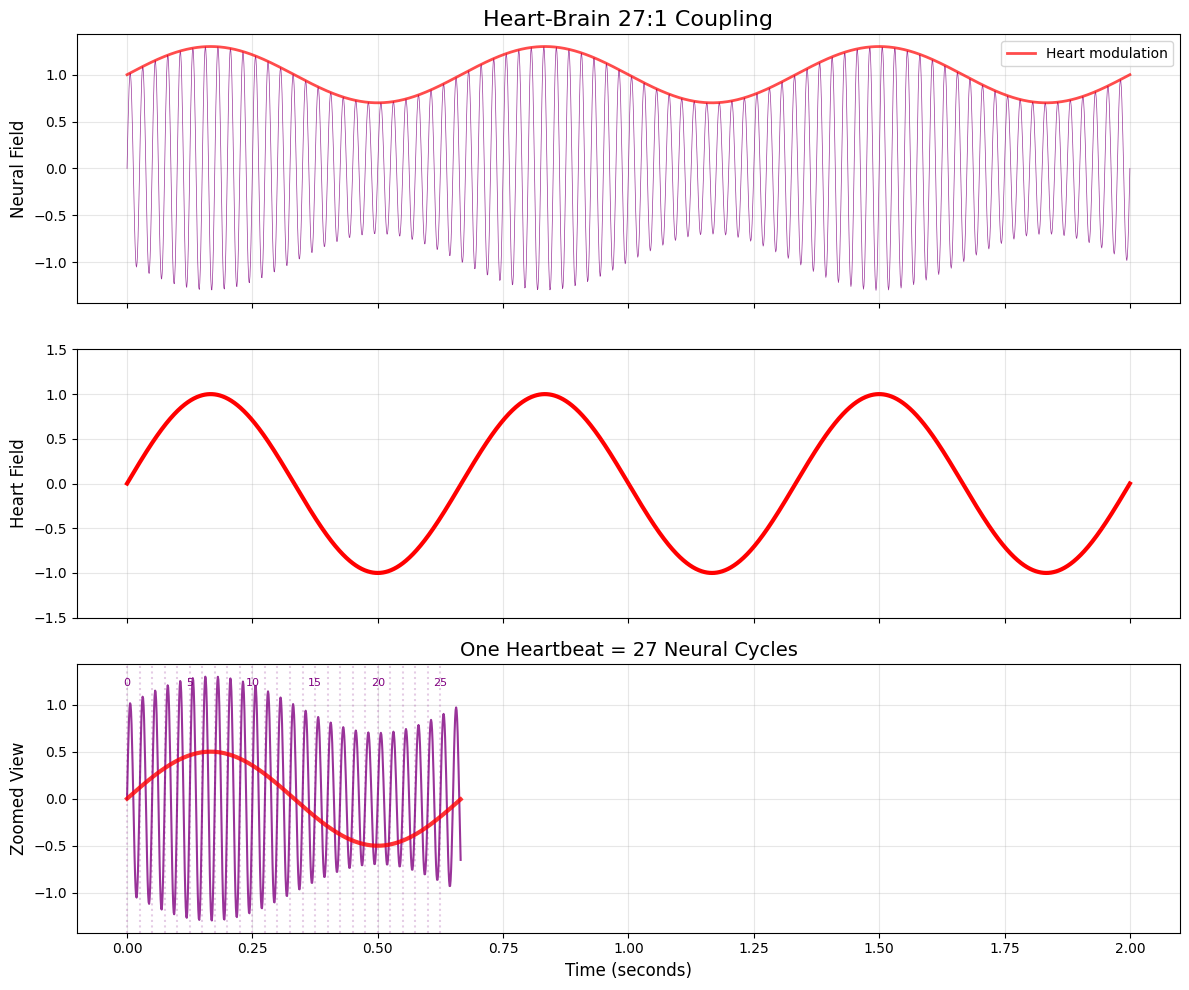


Ratio: 40/1.5 = 27:1
This coupling creates system-wide coherence!


In [10]:
# Generate and visualize heart-brain coupling
t = np.linspace(0, 2, 2000)  # 2 seconds

# Heart rhythm (1.5 Hz)
heart_freq = 1.5
heart_rhythm = np.sin(2 * np.pi * heart_freq * t)

# Neural rhythm (40 Hz)
neural_freq = 40
neural_rhythm = np.sin(2 * np.pi * neural_freq * t)

# Modulated neural (heart influences neural amplitude)
modulation = 0.3 * heart_rhythm + 1.0
neural_modulated = neural_rhythm * modulation

# Create visualization
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# Neural activity
ax1.plot(t, neural_modulated, 'purple', linewidth=0.5, alpha=0.8)
ax1.plot(t, modulation, 'red', linewidth=2, alpha=0.7, label='Heart modulation')
ax1.set_ylabel('Neural Field', fontsize=12)
ax1.set_title('Heart-Brain 27:1 Coupling', fontsize=16)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Heart rhythm
ax2.plot(t, heart_rhythm, 'red', linewidth=3)
ax2.set_ylabel('Heart Field', fontsize=12)
ax2.set_ylim(-1.5, 1.5)
ax2.grid(True, alpha=0.3)

# Show one heartbeat period zoomed
one_beat = int(1.0 / heart_freq * 2000 / 2)  # samples per heartbeat
t_zoom = t[:one_beat]
neural_zoom = neural_modulated[:one_beat]
heart_zoom = heart_rhythm[:one_beat]

ax3.plot(t_zoom, neural_zoom, 'purple', linewidth=1.5, alpha=0.8)
ax3.plot(t_zoom, heart_zoom * 0.5, 'red', linewidth=3, alpha=0.8)

# Count neural cycles
expected_cycles = neural_freq / heart_freq
ax3.set_xlabel('Time (seconds)', fontsize=12)
ax3.set_ylabel('Zoomed View', fontsize=12)
ax3.set_title(f'One Heartbeat = {expected_cycles:.0f} Neural Cycles', fontsize=14)
ax3.grid(True, alpha=0.3)

# Mark neural peaks
for i in range(int(expected_cycles)):
    x = i / neural_freq
    if x < t_zoom[-1]:
        ax3.axvline(x, color='purple', alpha=0.2, linestyle=':')
        if i % 5 == 0:
            ax3.text(x, 1.2, f'{i}', fontsize=8, ha='center', color='purple')

plt.tight_layout()
plt.show()

print(f"\nRatio: {neural_freq}/{heart_freq} = {neural_freq/heart_freq:.0f}:1")
print("This coupling creates system-wide coherence!")

## 4. Metatron's Cube at 8-Cell Stage

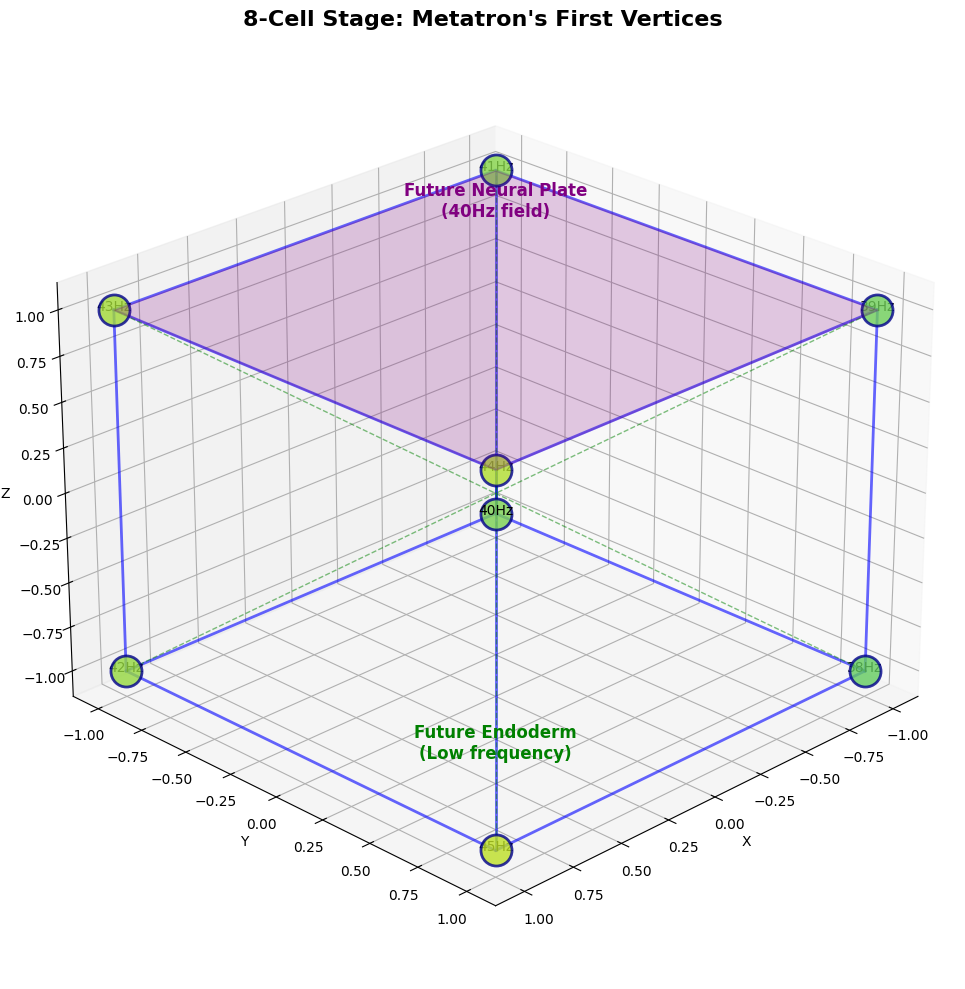


Sacred geometry emerges naturally from frequency relationships!
The 8 vertices create the foundation for all future body symmetry.


In [11]:
# 3D visualization of 8-cell sacred geometry
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Define vertices of cube (8 cells)
vertices = np.array([
    [0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0],  # Bottom
    [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1]   # Top
])

# Center and scale
vertices = (vertices - 0.5) * 2

# Draw edges
edges = [
    [0, 1], [1, 2], [2, 3], [3, 0],  # Bottom
    [4, 5], [5, 6], [6, 7], [7, 4],  # Top
    [0, 4], [1, 5], [2, 6], [3, 7]   # Vertical
]

for edge in edges:
    points = vertices[edge]
    ax.plot3D(*points.T, 'b-', linewidth=2, alpha=0.6)

# Draw cells with frequency labels
freqs = [40, 42, 45, 38, 41, 43, 44, 39]  # Slight variations around 40Hz
colors = plt.cm.viridis(np.array(freqs) / 50)

for i, (v, f, c) in enumerate(zip(vertices, freqs, colors)):
    ax.scatter(*v, s=500, c=[c], alpha=0.8, edgecolors='darkblue', linewidth=2)
    ax.text(v[0], v[1], v[2], f'{f}Hz', fontsize=10, ha='center')

# Draw internal star tetrahedron connections
star_edges = [[0, 6], [1, 7], [2, 4], [3, 5]]
for edge in star_edges:
    points = vertices[edge]
    ax.plot3D(*points.T, 'g--', linewidth=1, alpha=0.5)

# Highlight neural plate (top face)
neural_plate = vertices[[4, 5, 6, 7]]
verts = [neural_plate[[0, 1, 2, 3]]]
neural = Poly3DCollection(verts, alpha=0.2, facecolor='purple', edgecolor='purple')
ax.add_collection3d(neural)

# Annotations
ax.text(0, 0, 1.5, 'Future Neural Plate\n(40Hz field)', 
       fontsize=12, ha='center', color='purple', fontweight='bold')
ax.text(0, 0, -1.5, 'Future Endoderm\n(Low frequency)', 
       fontsize=12, ha='center', color='green', fontweight='bold')

# Interactive rotation
def update_view(elev, azim):
    ax.view_init(elev=elev, azim=azim)
    plt.draw()

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('8-Cell Stage: Metatron\'s First Vertices', fontsize=16, fontweight='bold')

# Initial view
ax.view_init(elev=25, azim=45)

plt.tight_layout()
plt.show()

print("\nSacred geometry emerges naturally from frequency relationships!")
print("The 8 vertices create the foundation for all future body symmetry.")

## 5. Complete Organ Frequency Map

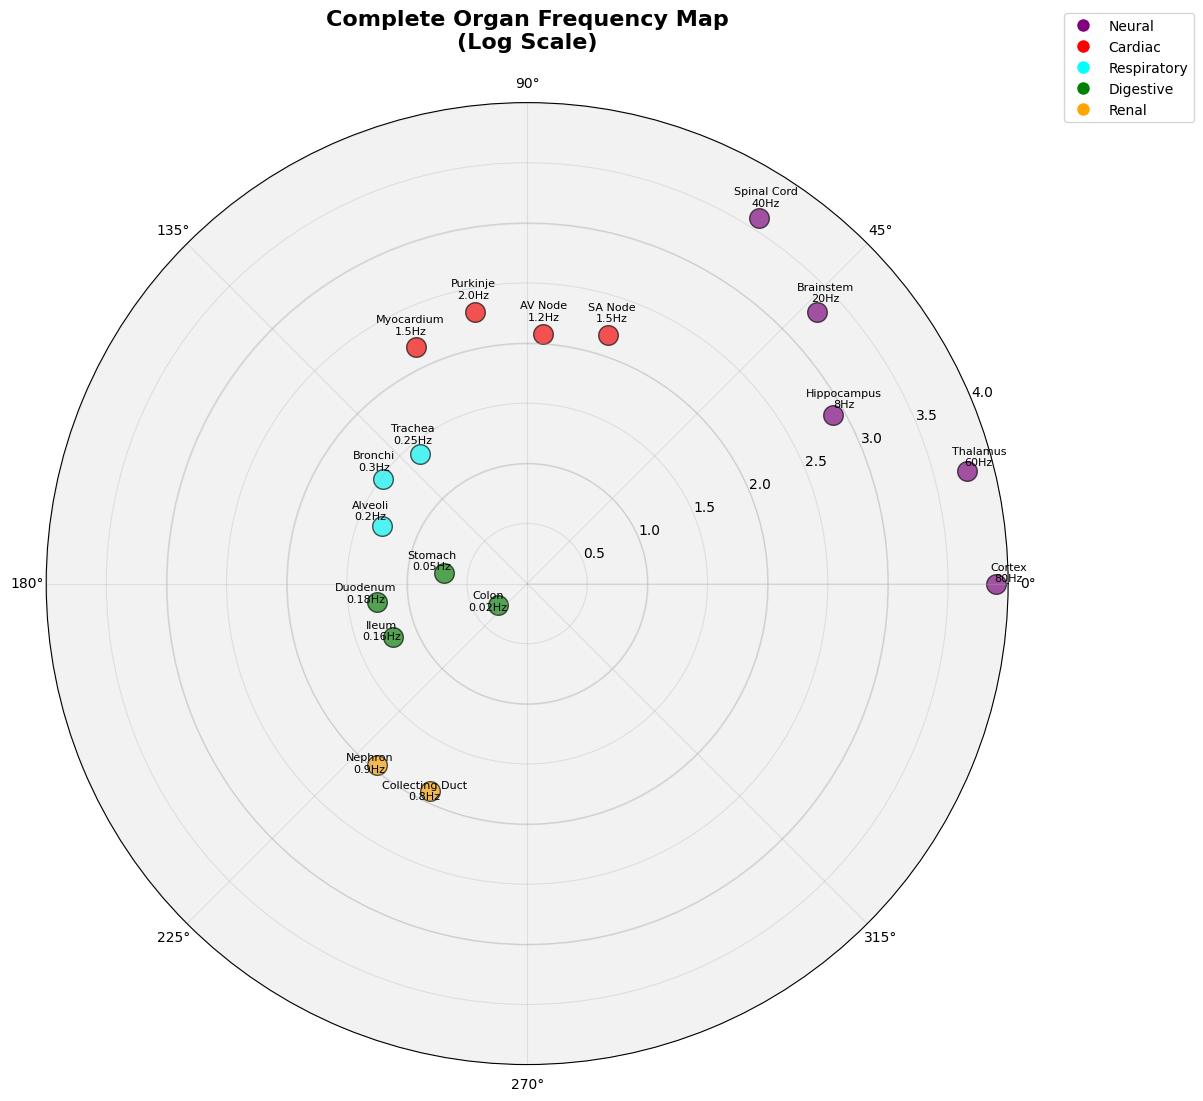


Every organ has its frequency signature!
Disease = frequency disruption
Healing = frequency restoration


In [12]:
# Create comprehensive frequency map
organ_frequencies = {
    'Neural': {
        'Cortex': 80, 'Thalamus': 60, 'Hippocampus': 8,
        'Brainstem': 20, 'Spinal Cord': 40
    },
    'Cardiac': {
        'SA Node': 1.5, 'AV Node': 1.2, 'Purkinje': 2.0,
        'Myocardium': 1.5
    },
    'Respiratory': {
        'Trachea': 0.25, 'Bronchi': 0.3, 'Alveoli': 0.2
    },
    'Digestive': {
        'Stomach': 0.05, 'Duodenum': 0.18, 'Ileum': 0.16,
        'Colon': 0.02
    },
    'Renal': {
        'Nephron': 0.9, 'Collecting Duct': 0.8
    }
}

# Create circular frequency diagram
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(projection='polar'))

# Color map for systems
system_colors = {
    'Neural': 'purple',
    'Cardiac': 'red',
    'Respiratory': 'cyan',
    'Digestive': 'green',
    'Renal': 'orange'
}

# Plot each organ
angle_offset = 0
for system, organs in organ_frequencies.items():
    color = system_colors[system]
    
    for organ, freq in organs.items():
        # Log scale for radius
        r = np.log10(freq) + 2
        theta = angle_offset
        
        # Plot point
        ax.scatter(theta, r, s=200, c=color, alpha=0.7, edgecolors='black')
        
        # Label
        ax.text(theta, r + 0.1, f"{organ}\n{freq}Hz", 
               ha='center', va='bottom', fontsize=8)
        
        angle_offset += 2 * np.pi / 25  # Spread around circle

# Add system labels
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                            markerfacecolor=color, markersize=10, label=system)
                  for system, color in system_colors.items()]
ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.2, 1.1))

# Formatting
ax.set_ylim(0, 4)
ax.set_title('Complete Organ Frequency Map\n(Log Scale)', fontsize=16, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3)

# Add frequency bands
bands = [(0.01, 0.1, 'Ultra-slow'), (0.1, 1, 'Slow'), 
         (1, 10, 'Medium'), (10, 100, 'Fast')]

for min_f, max_f, label in bands:
    r_min = np.log10(min_f) + 2
    r_max = np.log10(max_f) + 2
    ax.fill_between(np.linspace(0, 2*np.pi, 100), r_min, r_max, 
                   alpha=0.1, color='gray')

plt.tight_layout()
plt.show()

print("\nEvery organ has its frequency signature!")
print("Disease = frequency disruption")
print("Healing = frequency restoration")

## Summary: The Morphogenic Code

Dr. Mordin's discoveries revolutionize our understanding of development:

1. **Frequency IS the morphogenic code** - not just genes
2. **Octave relationships** create harmonic body systems
3. **27:1 coupling** links consciousness to circulation
4. **Sacred geometry** emerges naturally from frequency patterns
5. **Disease is decoherence** - treatment restores resonance

*"Had to map it. Had to see it. Someone else might have missed the harmonic beauty of life itself!"*

---

Next notebook: **MS02 - Tensegrity Dynamics** 🦴

In [13]:
import matplotlib.pyplot as plt

# Get all current figures
for i in plt.get_fignums():
    fig = plt.figure(i)
    fig.savefig(f'stella_figure_{i}.png', dpi=300, bbox_inches='tight')
    print(f"✓ Saved figure {i}")
    